# **Lab 2**
### Weightage 3%
## Linear Regression
---
Dataset used: 
  ACS Flammability Limit Computation

---



Maximum Points in the Lab: 65

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **Feb 21st 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In [0]:
# Import necessary libraries

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Describe the arguments and output of the linear regression function call in sklearn package.



---
**5 Points** 


---
fit_intercept - to specify intercept 0 or non-zero. 0 if set to false

normalize  - if fit_intercept set false this is ignored. if set true dataset will be normalized before regression by subtracting the mean and dividing by the l2-norm 

n_jobs - number of jobs to use for the computation. will only provide speedup for n_targets > 1 

class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None) - LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.



We will be using the ACS flammability limit computation dataset for linear regression task. The dataset contains 105 molecular properties of few chemical compounds from which Flammability Limit is to be computed. The following block contains code to read the excel file from the given URL and preprocess the data. **Please don't make any changes to the block below.**

In [0]:

# Load the dataset onto a data frame. !! Please dont make any changes !!
url = "https://ndownloader.figshare.com/files/18729491"
data_frame = pd.read_excel(url,encoding='latin-1',skiprows=5)

# Necessary attributes converted to numpy arrays
target = data_frame.iloc[:,4].to_numpy()
input_features = data_frame.iloc[:,6:].to_numpy()


We have input attributes and output vector ready. Now the first step is to split the entire dataset into training and test subsets. sklearn package provides you a flexible way of doing this. All you need to do is just specify input attributes array, target array and fraction of the test set. Once the split is done, we are ready to train the model and evaluate it. 

- We would like you to experiment with different test set fractions and comment on how well the model is able to estimate the target value for new test instances? 

- Also there is another flexibility to tune the intercept term on or off. We would like you to experiment on those possibilities as well.

**Note:** Don't forget to explicitly normalize the attributes.

---


**10 Points** 

---



In [73]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
test_size_fractions = [0.2,0.3,0.4,0.5]

mse_list = []

# Step 1: Create a linear regressor object 
# Insert your code below
linearRegressor = LinearRegression(normalize=True)

# Step 2: Create a linear regressor object forcing bias or intercept as 0
# Insert your code below
linearRegressor2 = LinearRegression(fit_intercept=False)

reqFraction = -1 ;
intercept = 0; 

minprediction = float('inf') ;


# Experiment with 8 different model setup

for fraction in test_size_fractions:
    
    
    # Step 3: Split into train and test set based on the fraction
    # Insert your code below
    train_X, test_X, train_Y, test_Y = train_test_split(input_features , target ,test_size = fraction )
    

    # Step 4(a): Train the Intercept Linear Regression model using held out training set
    # Insert your code below
    linearRegressor.fit(train_X, train_Y)                                                              

    # Step 4(b): Predict the target values using the trained model for test set instances
    # Insert your code below
    predictTestY = linearRegressor.predict(test_X) 

    # Step 4(c): Print the mean squared error of the model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below

    print('Mean Squared Error with non-zero intercept and test fraction = '+ str(fraction) + ' is ' + str(metrics.mean_squared_error(test_Y,  predictTestY )) )
    mse_list.append(metrics.mean_squared_error(test_Y,  predictTestY ))
    if metrics.mean_squared_error(test_Y,  predictTestY ) < minprediction :
      minprediction = metrics.mean_squared_error(test_Y,  predictTestY )
      reqFraction = fraction;
      intercept = 1;  
    
    

    # Step 5(a): Train the Non Intercept Linear Regression model using held out training set
    # Insert your code below
    linearRegressor2.fit(train_X, train_Y)

    # Step 5(b): Predict the target values using the trained non intercept for test set instances
    # Insert your code below
    predictTestY = linearRegressor2.predict(test_X)

    # Step 5(c): Print the mean squared error of the non intercept model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    print('Mean Squared Error with 0 intercept and test fraction = '+ str(fraction) + ' is ' + str(metrics.mean_squared_error(test_Y,  predictTestY )) )
    mse_list.append(metrics.mean_squared_error(test_Y,  predictTestY )) 
    if metrics.mean_squared_error(test_Y,  predictTestY ) < minprediction :
      minprediction = metrics.mean_squared_error(test_Y,  predictTestY )
      reqFraction = fraction;
      intercept = 0; 



Mean Squared Error with non-zero intercept and test fraction = 0.2 is 3.894712995205859e+21
Mean Squared Error with 0 intercept and test fraction = 0.2 is 0.22279298834513137
Mean Squared Error with non-zero intercept and test fraction = 0.3 is 2.067517802064761e+25
Mean Squared Error with 0 intercept and test fraction = 0.3 is 0.21848444131753425
Mean Squared Error with non-zero intercept and test fraction = 0.4 is 9.60748270652422e+22
Mean Squared Error with 0 intercept and test fraction = 0.4 is 0.2450511117492061
Mean Squared Error with non-zero intercept and test fraction = 0.5 is 2.739470710147773e+23
Mean Squared Error with 0 intercept and test fraction = 0.5 is 0.41019083719641014


We observe that with intercept present sum of squared errors is diverging for any test- train split that means data is centered around origin and decision boundary passes through origin. The MLE fails to converge because may be the data points are highly correlated and data is very sparse.

In the previous block you have experimented with different settings of the Linear Regression model. You have test set mean squared error stored. Figure out which setting gave the least mean squared error. 

---

**5 Points**

---




In [74]:
# Insert your code to identify the best fraction and intercept requirement. Also, print the best setting chosen.
 
 
 # the required code is written in above block itself in which minprediction has the minimum value value of prediction and reqFraction store the fraction of split and bool intercept shows
 # intercept present or not

print( ' req fraction is ' + str( reqFraction )  )

if intercept== 0 :
    print('intercept term is zero')

else :
    print('intercept term is non-zero')
    




 req fraction is 0.3
intercept term is zero


Now that you have figured out the best model setting, use that setting to train the model to predict test instances.


---

**3 Points**


---



In [75]:
# Step 1: Split the entire dataset into train and test set based on the best fraction
# Insert your code below
train_X, test_X, train_Y, test_Y = train_test_split(input_features , target ,test_size = reqFraction)

# Step 2: Create a linear regressor object with intercept turned on or off as per best model setting
# Insert your code below
if intercept== 0 :
    linearRegressor = LinearRegression(fit_intercept=False)


else :
    linearRegressor = LinearRegression(fit_intercept=True)



# Step 3(a): Train the Linear Regression model using training set
# Insert your code below

linearRegressor.fit(train_X, train_Y)  


# Step 3(b): Predict the target values using the trained model for test set instances
# Insert your code below
predictTestY = linearRegressor.predict(test_X)

# Step 3(c): Print the mean squared error of the model on test set. 
# Insert your code below
print(metrics.mean_squared_error(test_Y,  predictTestY ))


0.6104313413365903


Now check the goodness of the model with repsect to prediction on test instances. The aim is to predict the target values for test instances using the trained model. These values would be plotted against the true values of the test instances. A good model would yield a plot that looks *close to a line of slope 45 degree*. **Comment** on the goodness of the learned model using this test.

---

**5 points** 

---

There is heavy density of data points around the predicted label = actual label line. Though not all points lie exactly on the line. Baring a few outliers the predicted label are reasonably close enough to actual label. Because logistic regression assumes no error in the output variable (y), removing outliers and possibly misclassified instances from the training data could have resulted in more points lying closer to line with slope 1 through origin.







Text(0, 0.5, 'predicted label')

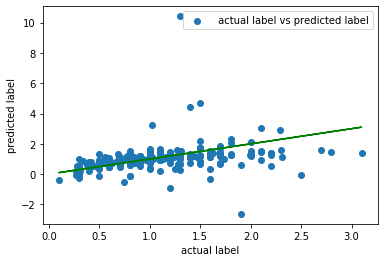

In [76]:
# Insert your code to plot true vs predicted test values
import matplotlib.pyplot as plt

plt.scatter(test_Y, predictTestY, label= ' actual label vs predicted label')
plt.plot(test_Y, test_Y, color='green')
plt.legend()
plt.xlabel('actual label')
plt.ylabel('predicted label')




You have implemented simple linear regression. You may apply regularization techniques that constrain the coefficients. We will be seeing 2 types of regularized regression techniques:


1.   Ridge Regression
2.   Lasso Regression



# Ridge Regression

---

Describe the arguments and output of the Ridge regression function call in sklearn package.




---
**5 Points** 


---
sklearn.linear_model.Ridge - Linear least squares with l2 regularization.This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

alpha - Regularization strength, reduces the variance of the estimates

fit_intercept - to specify intercept 0 or non-zero. 0 if set to false

normalize - if fit_intercept set false this is ignored. if set true dataset will be normalized before regression by subtracting the mean and dividing by the l2-norm

max_iter - Maximum number of iterations for conjugate gradient solver.

random_state - seed of the pseudo random number generator to use when shuffling the data

predict(self, X) - Predict using the linear model.







In ridge regression, L-2 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and comment on the model performance. You may use the best setting of Linear Regression to Ridge Regression also. **Comment** on the effect of the alpha value on the mean squared error.


---

**9 Points**


---
with increasing alpha the coefficient/weights of higher power terms are penalized more thus reducing the variance but at the same time bias starts to increase gradually and hence for large alpha values MSE increases. It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation. Higher values of alpha reduce overfitting BUT significantly high values can cause underfitting as well.


0.10079477687930763
0.10054875057918644
0.10060154248214158
0.1009721988010494
0.10151874330822075
0.1019858618725124
0.10238964575588859
0.10273861129517146
0.103041294860624
0.10330551661914172
0.10353789962562585
0.10507908400285282
0.10606909162651754
0.1069121208799052
0.10734555562892471
0.10762305925195109
0.10781997209176629
0.1083549097229554
0.10896417534850532
0.11011040563209203
0.11068961003154844
0.11126157677940222
0.11182163100030187
0.11236760682786547
0.11341527583833623


Text(0.5, 0, 'aplha')

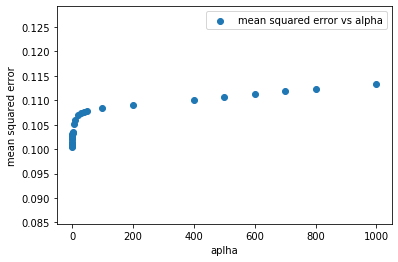

In [77]:
from sklearn.linear_model import RidgeClassifier

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2,5,10,20,30,40,50,100,200,400,500,600,700,800,1000]
error_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below

train_X, test_X, train_Y, test_Y = train_test_split(input_features , target ,test_size = reqFraction)


for alpha_ in alpha_values:


    # Step 2: Create a Ridge regressor object with desired alpha value
    # Insert your code below
    clf = Ridge(alpha = alpha_ )  

    

    # Step 3(a): Train the Ridge Regression model using training set
    # Insert your code below

    clf=clf.fit(train_X, train_Y)
    

    # Step 3(b): Predict the target values using the trained Ridge model for test set instances
    # Insert your code below

    predictTestY = clf.predict(test_X)    

   

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    print(metrics.mean_squared_error(test_Y,  predictTestY ))
    error_list.append(metrics.mean_squared_error(test_Y, predictTestY ))

# Step 4: Plot a graph of different alpha values of ridge regression versus mean squared error

plt.scatter(alpha_values, error_list, label= 'mean squared error vs alpha')
    
plt.legend()
plt.ylabel('mean squared error')
plt.xlabel('aplha')




# Lasso Regression

---

Describe the arguments and output of the Lasso regression function call in sklearn package.



---
**5 Points** 


---

Linear Model trained with L1 prior as regularizer

alpha - Constant that multiplies the L1 term

fit_intercept - to specify intercept 0 or non-zero. 0 if set to false

normalize - if fit_intercept set false this is ignored. if set true dataset will be normalized before regression by subtracting the mean and dividing by the l2-norm

max_iter - The maximum number of iterations

random_state - The seed of the pseudo random number generator that selects a random feature to update.

n_iter_ - number of iterations run by the coordinate descent solver to reach the specified tolerance.



In Lasso regression, L-1 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and **comment** on the model performance. You may use the best setting of Linear Regression to Lasso Regression also.

---

**9 Points**

---
we observe that MSE increases with increasing alpha beacuase lasso not only helps to reduce the variance but also helps in **feature selection** and higher alpha values can most coefficents become zero or nearly zero thus leads the model to underfit while ridge regression only reduces the coefficients close to zero, but not zero. Lasso provides **sparse solutions** which may underfit small datasets.


0.09667862895189863
0.10834199377698245
0.11535486417964537
0.12910128701791598
0.14770595413353033
0.1746675647128444
0.1840300403315941
0.18837777312465678
0.19370864154324777
0.20002264558736696
0.2073197852570144


Text(0.5, 0, 'aplha')

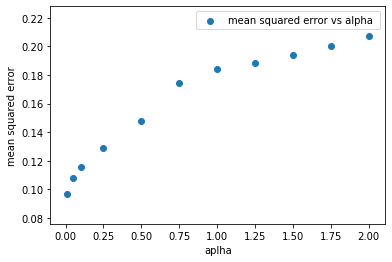

In [78]:
from sklearn import linear_model
import matplotlib.pyplot as plt

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below

train_X, test_X, train_Y, test_Y = train_test_split(input_features , target, test_size = reqFraction)


for alpha_ in alpha_values:

    # Step 2: Create a LASSO regressor object with desired alpha value
    # Insert your code below
    clf = Lasso(alpha = alpha_ )

   

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below

    clf=clf.fit(train_X, train_Y)    

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    predictTestY = clf.predict(test_X)

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    print(metrics.mean_squared_error(test_Y,  predictTestY ))
    error_list.append(metrics.mean_squared_error(test_Y,  predictTestY ) )


    


# Step 4: Plot a graph of different alpha values of lasso regression versus mean squared error

plt.scatter(alpha_values, error_list, label = 'mean squared error vs alpha ' )    
plt.legend()
plt.ylabel('mean squared error')
plt.xlabel('aplha')





Now since you have tried LASSO with different alpha values, you may try different number of maximum iterations associated with LASSO and **comment** on its effect on the mean squared error.


---

**9 Points**

---
we see that with the default value of aplha = 1 
there is a minimal change in MSE with increasing max iterations. There are two reason first is that aplha = 1 is  **base line case** i.e with alpha = 1. There will be large sparsity in the coefficients and the effect of only intercept term will be dominant. Secondly, the training dataset is very less thats why the model get trained in very less iterations around about 15. So, greater iterations are irrelevant as the model converges early on, we are very close to optimum and further iterations won’t have a substantial impact on coefficients.

To present effect of max iteration more clearly I plotted below the case when no of iteration is just 10 for both aplha = 1 and alpha = 0.01. As said above for aplha = 1 again constant curve observed with MSE about 0.14 while for 0.01 MSE reduced to about 0.06 and decreases with increasing max_iter as it will decrease the bias due to better exposure to dataset.

Thus we conclude that lasso is best when modelling cases where the no of features are huge. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored. While ridge works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation but lasso will reduce the correlated coefficients to zero and thus even small values of alpha will give significant sparsity.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.844050641010284, tolerance: 0.017961211096850126
  positive)


0.153278375252117
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.15258955513857586
0.

Text(0.5, 0, 'max_iteration')

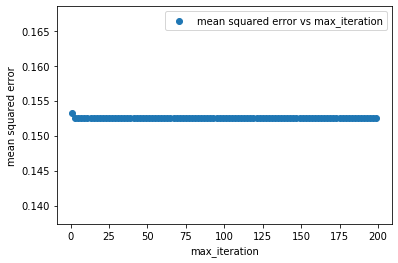

In [79]:

# Step 1: Split into train and test set based on the best fraction
# Insert your code below

train_X, test_X, train_Y, test_Y = train_test_split(input_features , target ,test_size = reqFraction)
error_list = []
max_iterations = []
for m_iterations in range(1,200,2):  

    max_iterations.append(m_iterations)
    # Step 2: Create a LASSO regressor object with desired number of iterations
    # Insert your code below
    clf = Lasso( max_iter = m_iterations )
    

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below

    clf=clf.fit(train_X, train_Y)

    

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    predictTestY = clf.predict(test_X)
   

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    print(metrics.mean_squared_error(test_Y,  predictTestY ))
    error_list.append(metrics.mean_squared_error(test_Y,  predictTestY ) )


# Step 4: Plot a graph of different max iteration values of lasso regression versus mean squared error


plt.scatter(max_iterations, error_list, label = 'mean squared error vs max_iteration' )    
plt.legend()
plt.ylabel('mean squared error')
plt.xlabel('max_iteration')





0.06508146979438036
0.06176001810570993
0.060924495879349956
0.060866596478662216
0.06078316595452073


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.69990734534506, tolerance: 0.018941121912066188
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.050230293677018, tolerance: 0.018941121912066188
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.070717361859405, tolerance: 0.018941121912066188
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

Text(0.5, 0, 'max_iteration')

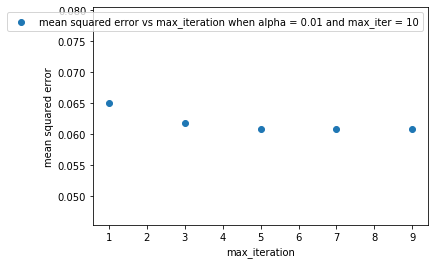

In [80]:
# with alpha = 0.01 and iterations = 10 we see change in MSE

train_X, test_X, train_Y, test_Y = train_test_split(input_features , target ,test_size = reqFraction)
error_list = []
max_iterations = []
for m_iterations in range(1,10,2):  

    max_iterations.append(m_iterations)
    # Step 2: Create a LASSO regressor object with desired number of iterations
    # Insert your code below
    clf = Lasso( max_iter = m_iterations , alpha = 0.01 )
    

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below

    clf=clf.fit(train_X, train_Y)

    

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    predictTestY = clf.predict(test_X)
   

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    print(metrics.mean_squared_error(test_Y,  predictTestY ))
    error_list.append(metrics.mean_squared_error(test_Y,  predictTestY ) )


# Step 4: Plot a graph of different max iteration values of lasso regression versus mean squared error


plt.scatter(max_iterations, error_list, label = 'mean squared error vs max_iteration when alpha = 0.01 and max_iter = 10' )    
plt.legend()
plt.ylabel('mean squared error')
plt.xlabel('max_iteration')


0.13837311089885382
0.13638565437182343
0.13638565437182343
0.13638565437182343
0.13638565437182343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4859921894562405, tolerance: 0.018810402861534313
  positive)


Text(0.5, 0, 'max_iteration')

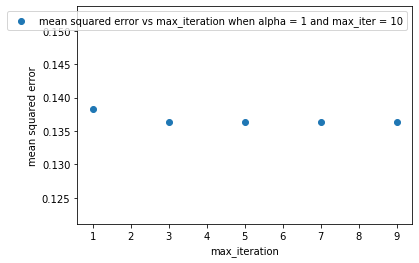

In [81]:
# with alpha = 0.01 and iterations = 10 we see change in MSE

train_X, test_X, train_Y, test_Y = train_test_split(input_features , target ,test_size = reqFraction)
error_list = []
max_iterations = []
for m_iterations in range(1,10,2):  

    max_iterations.append(m_iterations)
    # Step 2: Create a LASSO regressor object with desired number of iterations
    # Insert your code below
    clf = Lasso( max_iter = m_iterations , alpha = 1 )
    

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below

    clf=clf.fit(train_X, train_Y)

    

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    predictTestY = clf.predict(test_X)
   

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    print(metrics.mean_squared_error(test_Y,  predictTestY ))
    error_list.append(metrics.mean_squared_error(test_Y,  predictTestY ) )


# Step 4: Plot a graph of different max iteration values of lasso regression versus mean squared error


plt.scatter(max_iterations, error_list, label = 'mean squared error vs max_iteration when alpha = 1 and max_iter = 10' )    
plt.legend()
plt.ylabel('mean squared error')
plt.xlabel('max_iteration')
